In [3]:
import numpy as np
import glob #for file pattern matching in directories
import random #for random number generation and selections.
import imageio #for reading and writing images in various formats
import PIL, cv2 # Provides extensive image processing capabilities
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image, erosion # Performs morphological image processing operations.
#for image segmentation and feature extraction.
from skimage.morphology import square
import matplotlib.image as mpimg #Reads and displays images with Matplotlib
import skimage
import math
from scipy.ndimage import convolve #Performs convolution operations on images such as filtering and feature extraction tasks
from PIL import Image,ImageFilter #Offers a collection of filters for image processing.
from skimage.feature import hessian_matrix, hessian_matrix_eigvals #Compute Hessian matrix and its eigenvalues for edge and blob detection.

Introduction:
Fingerprint preprocessing involves: Image Acquisition, Image Enhancing, Feature extraction and matching with template. Since the dataset has unique fingerprints we implement feature extraction and different techniques for enhancing images such as Edge detection, adaptive thresholding.
Feature extraction constitutes of Ridge detection (level 1 feature) and Minutiae extraction (level 3 feature) to generate a template after which a query image is matched using the metric ROC AUC curve.
ROC AUC) is a performance metric commonly used in binary classification tasks to evaluate the effectiveness of a predictive model.

In [5]:
# LOAD THE DATASET

DATA_DIR = "C:\\Users\\Hp\\Desktop\\ML PROJECT\\fingerprint_datasets\\Real\\"
list_dirs = list(glob.glob(DATA_DIR+"*.BMP"))
# count the number of images in the dataset
num_images = len(list_dirs)
print(num_images)

6000


Displaying random images from data

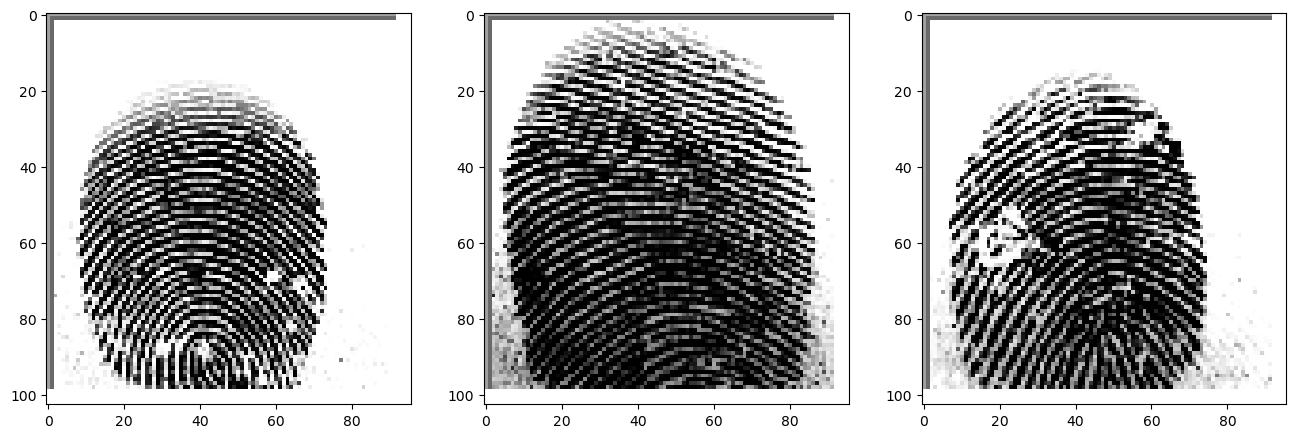

In [6]:
import imageio.v2 as imageio
random.seed(42)
# set the random integer r between 0 and num_images-1
r = random.randint(0,num_images)
display_list = list_dirs[r:r+3]
#display 3 images
image1 = imageio.imread(display_list[0])
image2 = imageio.imread(display_list[1])
image3 = imageio.imread(display_list[2])
#This line creates a single figure with three subplots arranged horizontally
fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

IMAGE TRANSFORMATIONS AND ENHANCEMENT

<b>Image Smoothening</b> to reduce noise and remove small details in an image while preserving its overall structure.
Techniques used in smoothening;
The choice of a smoothing technique depends on the specific application and the characteristics of the noise present in the image.
Gaussian Smoothing: It applies a Gaussian kernel to the image, which is a bell-shaped function. The convolution operation with the Gaussian kernel effectively blurs the image, reducing the effect of noise.
Median Filtering: It replaces each pixel in the image with the median value of the pixels in its neighborhood. Median filtering is effective in removing salt-and-pepper noise while preserving edges.
Average Smoothing (Mean Filtering): It replaces each pixel in the image with the average value of the pixels in its neighborhood. This method is simple and can be effective for reducing random noise.

<b>Thresholding,</b> is a fundamental image processing technique used to convert a grayscale image into a binary image. In a binary image, each pixel is either classified as "foreground" (typically represented by a white pixel, with a value of 1) or "background" (usually represented by a black pixel, with a value of 0), based on a specific threshold value.
  It is useful in image segmentation.
  
  Global Thresholding: A single threshold value is applied to the entire image, assuming the foreground and background have distinct intensity values.

Adaptive Thresholding: Different threshold values are applied to different regions of the image, taking local intensity variations into account. Adaptive thresholding is suitable for images with varying lighting conditions.
Binary Thresholding: The simplest form of thresholding, where a fixed threshold value is manually set to segment the image.

<b>Edge Detection,</b>is a crucial image processing technique used to identify and highlight boundaries or edges in an image
These techniques are used to make features more prominent in data for extraction to be more accurate.

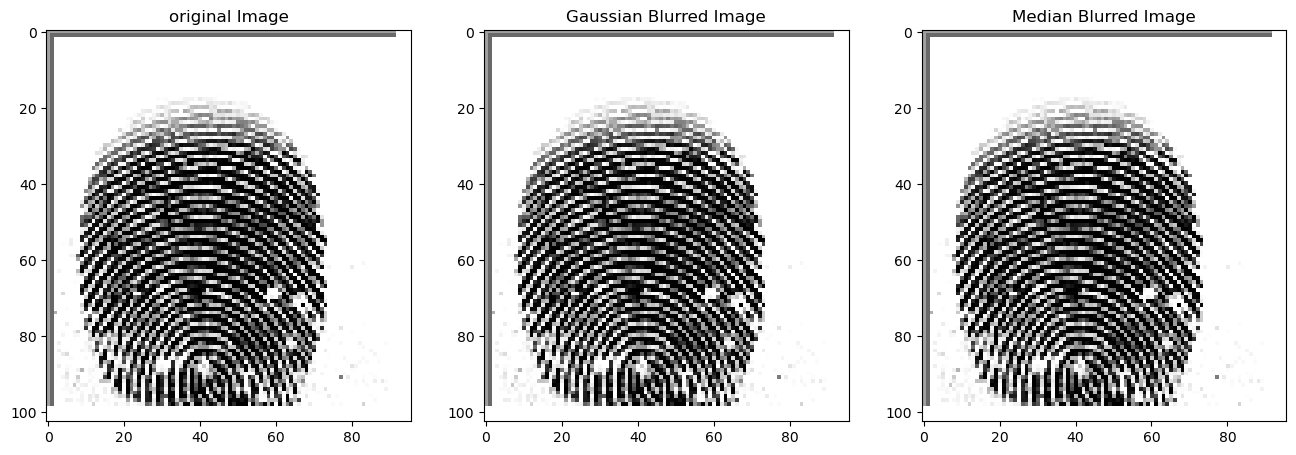

In [7]:
# Gaussian and Median Smoothening 
gauss_blur = cv2.GaussianBlur(image1,(1,1),0)
median_blur = cv2.medianBlur(image1,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(image1);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);

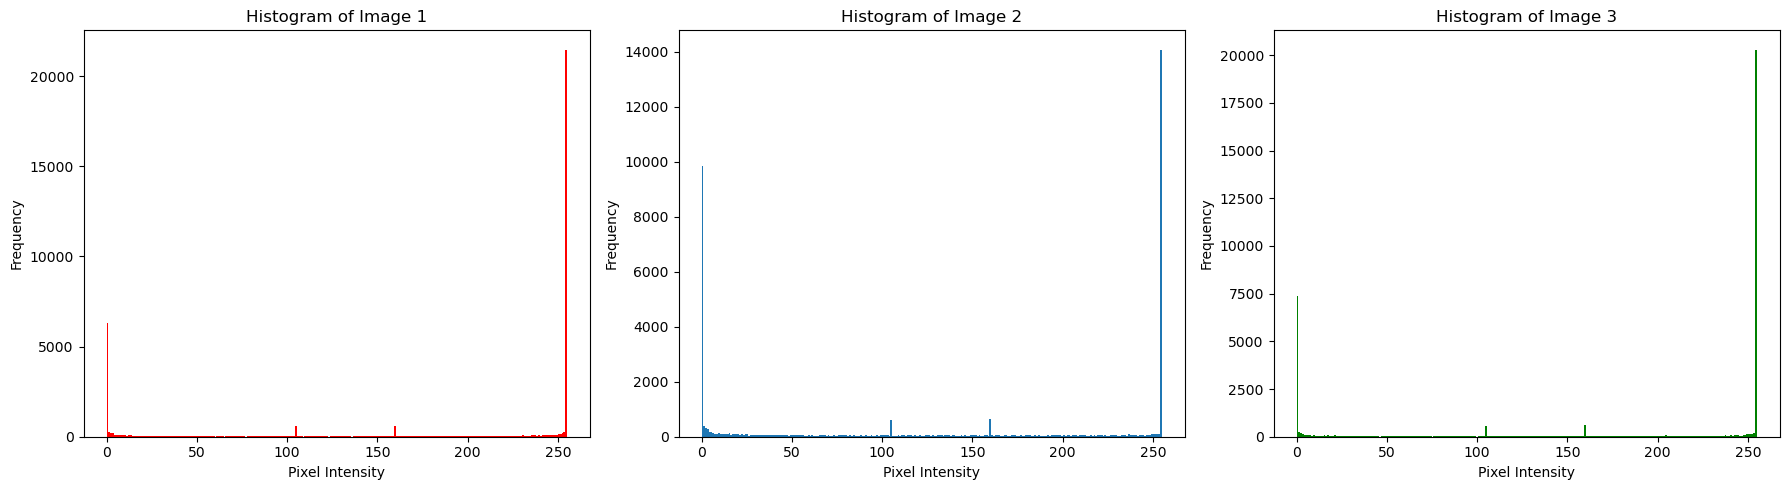

In [8]:
# HISTOGRAM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(image1.ravel(), bins=256, color="r")
axes[0].set_title("Histogram of Image 1")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

axes[1].hist(image2.ravel(), bins=256)
axes[1].set_title("Histogram of Image 2")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

axes[2].hist(image3.ravel(), bins=256, color="g")
axes[2].set_title("Histogram of Image 3")
axes[2].set_xlabel("Pixel Intensity")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


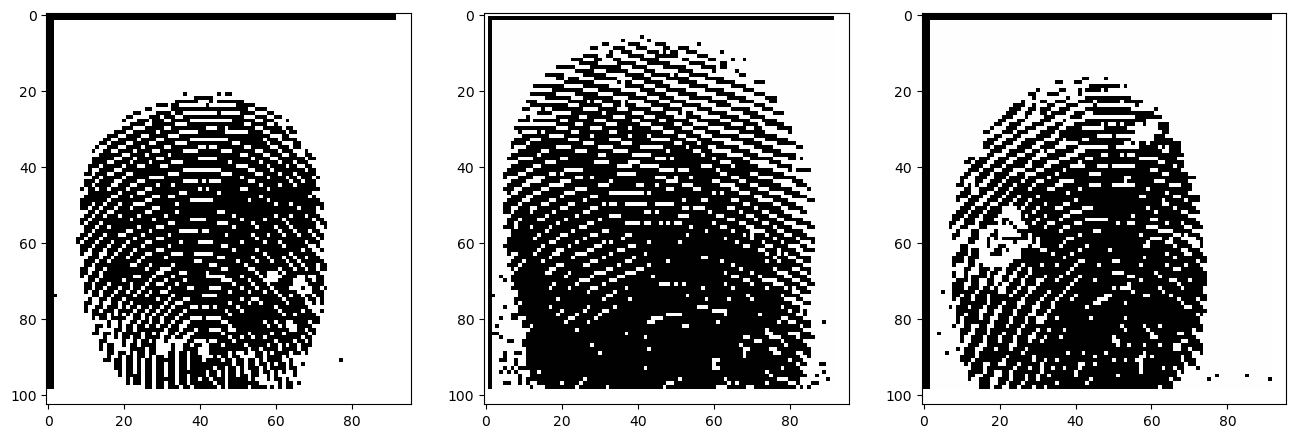

In [9]:
#Data seems to be almost binary - implementing mean and adaptive thresholding
# mean thresholding - gives bad results
THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()
#a threshold value is calculated as the mean intensity value of the entire image

image1 = np.array(image1 > THRESHOLD1).astype(int) * 255
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

Otsu's method automatically calculates an optimal threshold that minimizes the intra-class variance between foreground and background pixels, making it suitable for images with bimodal intensity distributions.

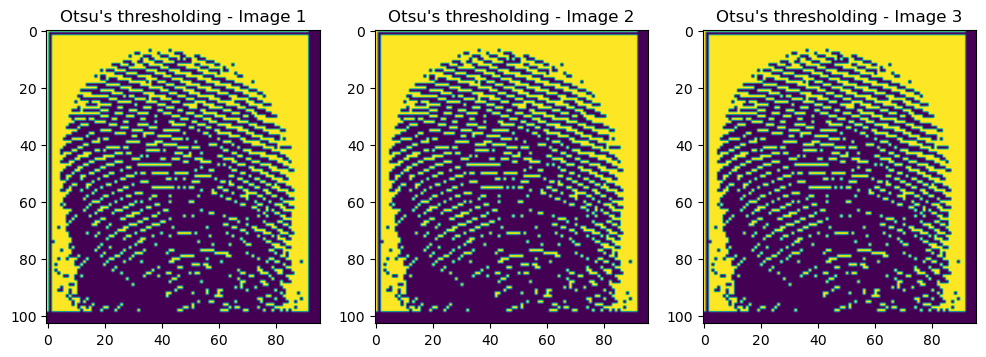

In [10]:
# Adaptive thresholding from OpenCV library - better than Mean Thresholding

img1 = cv2.imread(display_list[0],0)
img2 = cv2.imread(display_list[1],0)
img3 = cv2.imread(display_list[2],0)

# Otsu's thresholding
ret1,th1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Otsu's thresholding - Image 1");
axes[0].imshow(th2);
axes[1].set_title("Otsu's thresholding - Image 2");
axes[1].imshow(th2);
axes[2].set_title("Otsu's thresholding - Image 3");
axes[2].imshow(th2);

In [11]:
# EDGE DETECTION
# convert to grayscale
img_name = display_list[0]
# convert the image to a numpy array in grayscale
gray_img_array = np.array(Image.open(img_name).convert('P'))

In [12]:
#Robert, Sobel, Prewitt Filters
#These filters are 3x3 convolution kernels that are applied to an image
#to highlight the edges in different directions.
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

> = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [13]:
# implementing:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )

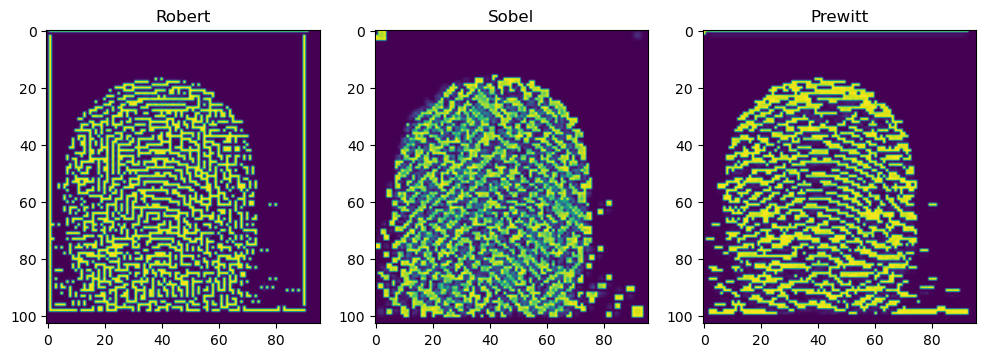

In [14]:
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

for detecting ridges in a grayscale image using the Hessian matrix.
The Hessian matrix represents the local structure of the image intensity.
sigma controls the scale of the Hessian calculation, 
In this case, maxima_ridges represents the maximum curvature, which indicates ridge-like structures, and minima_ridges represents the minimum curvature, which indicates valley-like structures.

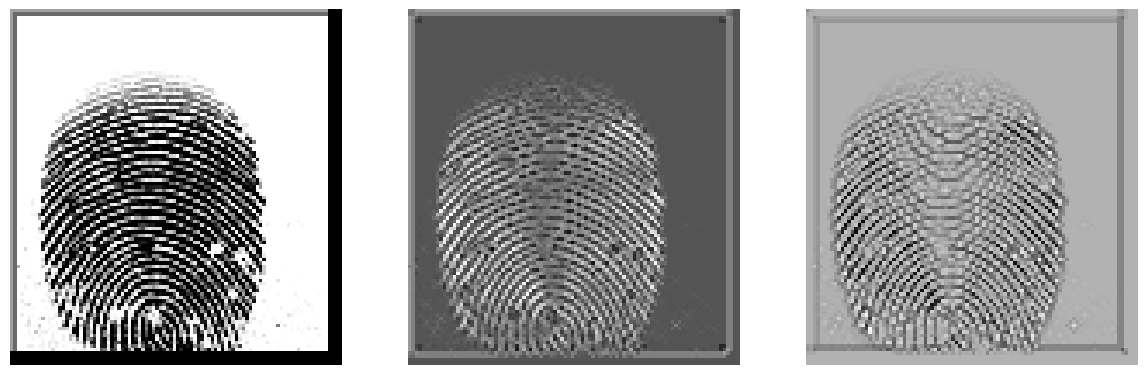

In [15]:
#implementation of ridges
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

Termination and Bifurcation detection and Minutiae Extraction¶
The given code extracts features like Termination, Bifurcation and Minutiae from finger prints, the output is shown below the code:

In [16]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [17]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

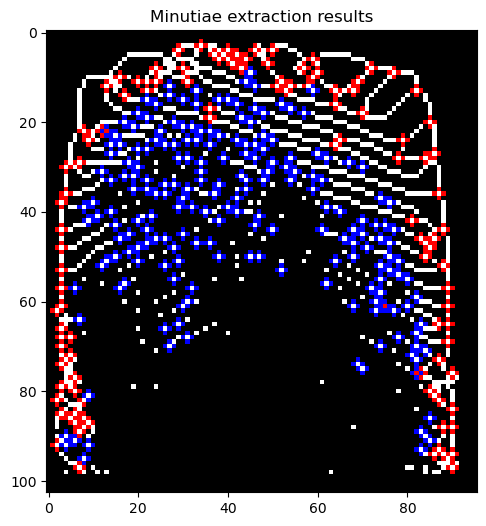

In [18]:
img_name = display_list[1]
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)